THIS IS NOTEBOOK OF DIMENSIONALITY REDUCTION

In [2]:
#import variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
features = ['pclass','sex','age','sibsp','fare','alone']

#missing values
df['age'].fillna(df['age'].median(),inplace=True)

#encode category values
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['alone'] = LabelEncoder().fit_transform(df['alone'])

In [9]:
#feature matrix 
x= df[features]

#scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [10]:
#PCA 
pca = PCA(n_components=2)       #reduced to 2 components
x_pca = pca.fit_transform(x_scaled)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Explained variance ratio: [0.33052333 0.27710982]


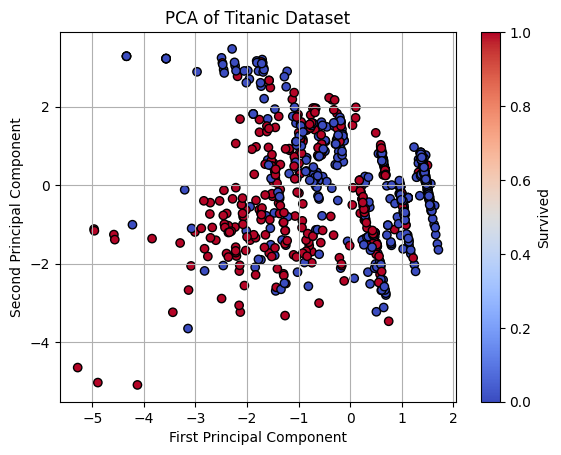

In [12]:
#Plot results of PCA
plt.scatter(x_pca[:,0], x_pca[:,1], c=df['survived'], cmap='coolwarm', edgecolor='k')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Titanic Dataset')
plt.colorbar(label='Survived')
plt.grid(True)
plt.show()

NOW WITH THE IRIS DATASET FOR MORE CLEAR DIAGRAM    

In [14]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
# Separate features and labels
X = iris.drop('species', axis=1)
y = iris['species']

In [16]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [18]:
# a new DataFrame for easy plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y

In [19]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))

Explained variance ratio: [0.72962445 0.22850762]
Total Variance Explained: 0.9581320720000164


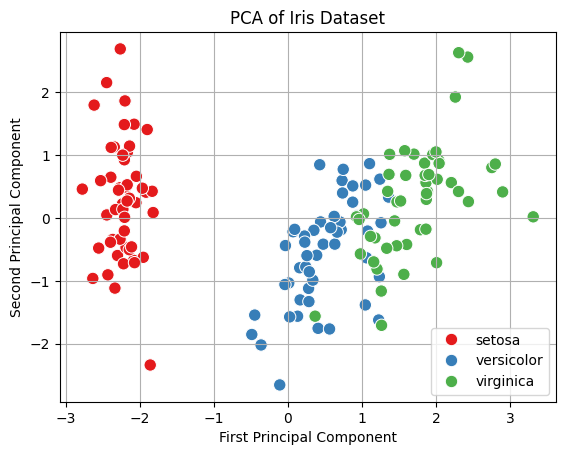

In [20]:
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='Set1', s=80)
plt.title('PCA of Iris Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)
plt.legend()
plt.show()